# Testing grounds

In [17]:
import kwant
import numpy as np
from numpy import linalg as LA
import scipy.sparse.linalg as sla
from types import SimpleNamespace
import holoviews as hv
from holoviews import opts
from matplotlib import pyplot as plt
hv.extension('matplotlib', logo=False) #BOKEH DOESNT SUPPORT LATEX IN LABELS
hv.output(fig='svg')
import time

s_0 = np.identity(2)
s_z = np.array([[1, 0], [0, -1]])
s_x = np.array([[0, 1], [1, 0]])
s_y = np.array([[0, -1j], [1j, 0]])
# pauli = [sx,sy,sz] #pauli = {'x':sx, 'y':sy, 'z':sz} #as dictionary

#define the Pauli matrices 
pauli = SimpleNamespace(s0=np.array([[1., 0.], [0., 1.]]),
                        sx=np.array([[0., 1.], [1., 0.]]),
                        sy=np.array([[0., -1j], [1j, 0.]]),
                        sz=np.array([[1., 0.], [0., -1.]]))

pauli.s0s0 = np.kron(pauli.s0, pauli.s0) # I(4)
pauli.s0sx = np.kron(pauli.s0, pauli.sx) # 4x4 \sigma_x
pauli.s0sy = np.kron(pauli.s0, pauli.sy) # 4x4 \sigma_y
pauli.s0sz = np.kron(pauli.s0, pauli.sz) # 4x4 \sigma_z
pauli.sxs0 = np.kron(pauli.sx, pauli.s0) # \tau_x
pauli.sys0 = np.kron(pauli.sy, pauli.s0) # \tau_y
pauli.szs0 = np.kron(pauli.sz, pauli.s0) # \tau_z

In [44]:
#define a Boolean function to shape your system
r = 15
def disk(position): 
    x,y = position
    return x**2 + y**2 < r**2

def magn_texture(position,azi_winding, radi_winding, radius):
    x,y = position
    p = azi_winding
    q = radi_winding
    R = radius
    r = np.sqrt(x**2 + y**2)
#     if x is not 0:
#         t = np.arctan(y/x)
#     else:
#         t = np.arctan(np.inf*y)
    t = np.arctan(y/x) #be careful not to pass x=0!
    B = [np.sin(2*np.pi*q*(r/R))*np.cos(2*np.pi*q*t), np.sin(2*np.pi*q*(r/R))*np.sin(q*t), np.cos(2*np.pi*q*(r/R))]
    return B

def onsite(position, t, mu, j, azi_winding, radi_winding, radius, delta): #define a function to determine the onsite energy term of the Hamiltonian
    B = [1,1,1] #magn_texture(position,azi_winding,radi_winding,radius) #calculate direction of magnetic field at position (x,y)
    return 4*t*pauli.szs0 - mu*pauli.szs0 + j*(B[0]*pauli.s0sx + B[1]*pauli.s0sy + B[2]*pauli.s0sz) + pauli.szs0*mu + delta*pauli.sxs0
    
def hopping(position1,position2,t): #define the hopping terms in your system
    return -t*pauli.szs0

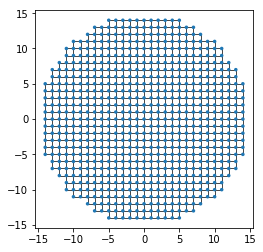

In [45]:
sys = kwant.Builder() #initialize your system
sqlat = kwant.lattice.square()


sys[sqlat.shape(disk,(0,0))]= onsite
sys[sqlat.neighbors()]= hopping

kwant.plot(sys)
sys= sys.finalized()

In [46]:
pars = dict(t=1, mu=-0.1, j=0.02, delta=0.2, azi_winding=1, radi_winding=1,radius=15)

In [47]:
ham = sys.hamiltonian_submatrix(params=pars)

In [49]:
t1 = time.time()
eVal,eVec =LA.eigh(ham)
t2 = time.time()
print(t2-t1)

7.4077582359313965


In [ ]:
t1 = time.time()
eVal, eVec = sla.eigsh(ham_sparse,k=6, which = 'SM')
t2 = time.time()

t2-t1

2788

In [50]:
hv.Path((np.arange(len(eVal)),eVal))

:Path   [x,y]

In [15]:
np.shape(ham)

(1220, 1220)